In [1]:
import pandas as pd
data = pd.read_csv("Sales_data_zone_wise.csv")
data.head()

,Month,Zone - A,Zone - B,Zone - C,Zone - D
0,Month - 1,1483525,1748451,1523308,2267260
1,Month - 2,1238428,1707421,2212113,1994341
2,Month - 3,1860771,2091194,1282374,1241600
3,Month - 4,1871571,1759617,2290580,2252681
4,Month - 5,1244922,1606010,1818334,1326062


In [2]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29 entries, 0 to 28
Data columns (total 5 columns):
Month       29 non-null object
Zone - A    29 non-null int64
Zone - B    29 non-null int64
Zone - C    29 non-null int64
Zone - D    29 non-null int64
dtypes: int64(4), object(1)
memory usage: 1.2+ KB


# ● The mean sales generated by each zone

In [3]:
import numpy as np
print("mean of Zone - A : ", np.mean(data['Zone - A']))
print("mean of Zone - B : ", np.mean(data['Zone - B']))
print("mean of Zone - C : ", np.mean(data['Zone - C']))
print("mean of Zone - D : ", np.mean(data['Zone - D']))

mean of Zone - A :  1540493.1379310344
mean of Zone - B :  1755559.5862068965
mean of Zone - C :  1772871.0344827587
mean of Zone - D :  1842926.7586206896


# ● Total sales generated by all the zones for each month.

In [4]:
data["Sum"] = data.sum(axis=1)
data

,Month,Zone - A,Zone - B,Zone - C,Zone - D,Sum
0,Month - 1,1483525,1748451,1523308,2267260,7022544
1,Month - 2,1238428,1707421,2212113,1994341,7152303
2,Month - 3,1860771,2091194,1282374,1241600,6475939
3,Month - 4,1871571,1759617,2290580,2252681,8174449
4,Month - 5,1244922,1606010,1818334,1326062,5995328
5,Month - 6,1534390,1573128,1751825,2292044,7151387
6,Month - 7,1820196,1992031,1786826,1688055,7287108
7,Month - 8,1625696,1665534,2161754,2363315,7816299
8,Month - 9,1652644,1873402,1755290,1422059,6703395
9,Month - 10,1852450,1913059,1754314,1608387,7128210


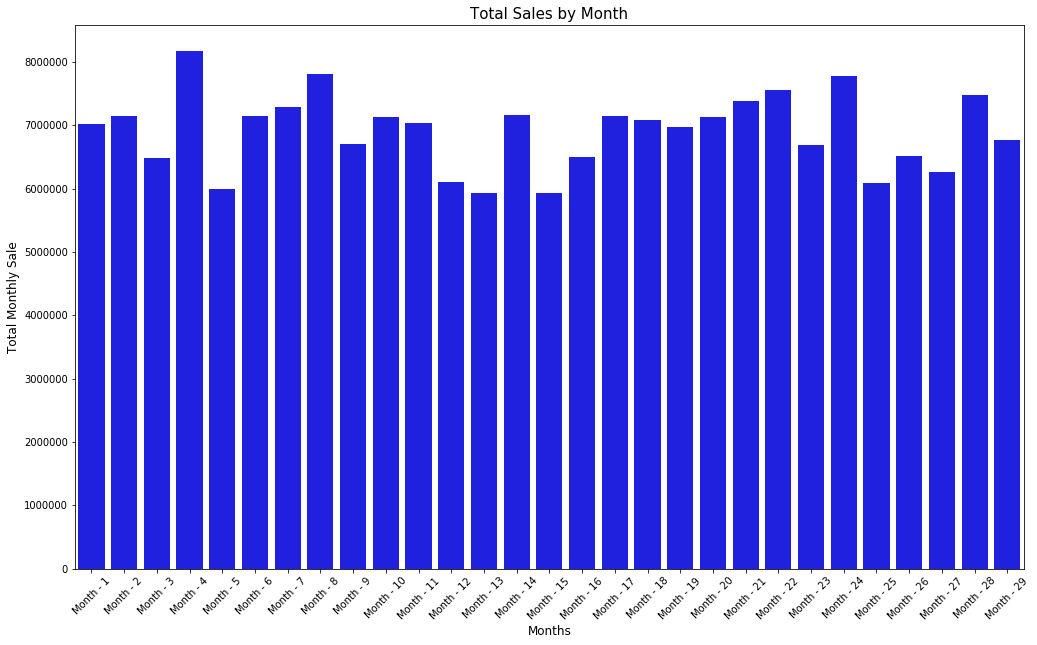

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(17,10))
sns.barplot(data =data ,x = "Month", y = "Sum",color="blue")
plt.title("Total Sales by Month", fontsize = 15)
plt.xlabel("Months", fontsize=12)
plt.ylabel("Total Monthly Sale", fontsize = 12)
plt.xticks(rotation = 45)
plt.show()

# Check whether all the zones generate the same amount of sales

### Null hypothesis : All the zones generate the same amount of sales.
### Alternate hypothesis : All the zones generate different amount of sales.
### Alpha = 0.05

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

Text(0.5, 0, 'Zones')

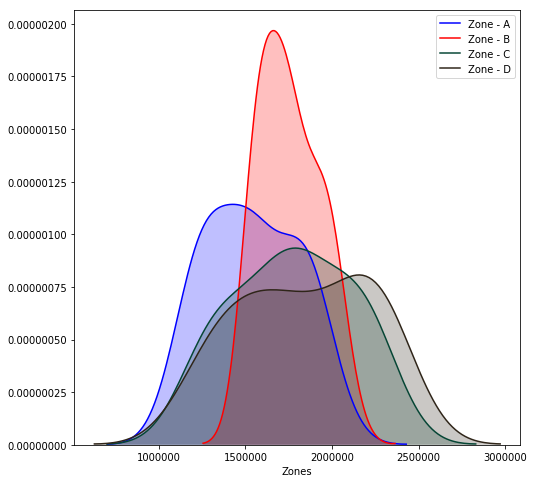

In [11]:
# Plotting the KDE Plot of all Zones
plt.figure(figsize=(8,8))
sns.kdeplot(data['Zone - A'], color='b', shade=True, Label='Zone - A')
sns.kdeplot(data['Zone - B'], color='r', shade=True, Label='Zone - B')
sns.kdeplot(data['Zone - C'], color='#064635', shade=True, Label='Zone - C')
sns.kdeplot(data['Zone - D'], color='#2F2519', shade=True, Label='Zone - D')
plt.legend()
plt.xlabel('Zones')

### H0 :There is no significant difference among the zone wise sales.
### H1 :There is significant difference among the zone wise sales.

In [13]:
import scipy.stats as stats
import statsmodels.api as sm
from statsmodels.formula.api import ols
fvalue,pvalue=stats.f_oneway(data['Zone - A'],data['Zone - B'],data['Zone - C'],data['Zone - D'])
print(fvalue,pvalue)

5.672056106843581 0.0011827601694503335


In [16]:
alpha = 0.05
if pvalue > alpha:
    print("We're Unable to reject the Null Hypothesis")
elif pvalue < alpha:
    print ("Reject the Null Hypothesis")

Reject the Null Hypothesis


All the zones are not generating the same amount of sales.